In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [79]:
data1 = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,Surname,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
0,1,Hargrave,619,42,2,0.00,101348.88,1
1,2,Hill,608,41,1,83807.86,112542.58,0
2,3,Onio,502,42,8,159660.80,113931.57,1
3,4,Boni,699,39,1,0.00,93826.63,0
4,5,Mitchell,850,43,2,125510.82,79084.10,0


In [4]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

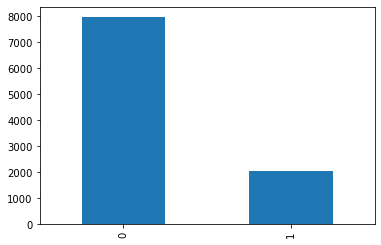

In [7]:
data.Exited.value_counts().plot(kind='bar')
plt.show()

In [8]:
def ageGroup(x):
    if x > 0 and x <=20:
        return '0-20'
    if x > 20 and x <=40:
        return '20-40'
    if x > 40 and x <=60:
        return '40-60'
    if x > 60 and x <=80:
        return '60-80'
    if x > 80 and x <=100:
        return '80-100'

In [9]:
data.Age.max()

92

In [10]:
df = data.copy()

In [11]:
df['age_group'] = df.Age.apply(lambda x : ageGroup(x))

In [12]:
df['age_group'].value_counts()

20-40     6330
40-60     3117
60-80      452
0-20        89
80-100      12
Name: age_group, dtype: int64

<AxesSubplot:>

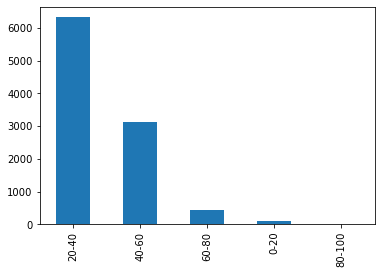

In [13]:
df['age_group'].value_counts().plot(kind='bar')

In [14]:
columns = data.select_dtypes(include=np.number).columns.tolist()

In [15]:
null_perc = pd.DataFrame(100*data.isnull().sum()/len(data.index)).reset_index()

C:\Users\Nuke Launch Code\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


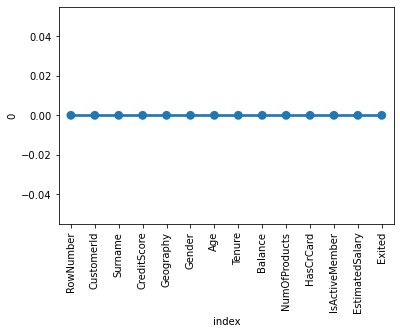

In [16]:
sns.pointplot('index',0,data=null_perc)
plt.xticks(rotation=90)
plt.show()

In [17]:
data = data.drop('CustomerId',axis=1)
data.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

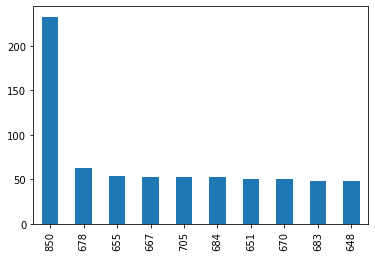

In [18]:
data.CreditScore.value_counts()[0:10].plot(kind="bar")

In [ ]:
tenure_group = ["{0}-{1}".format(i,)]

# Urivariate Analysis 

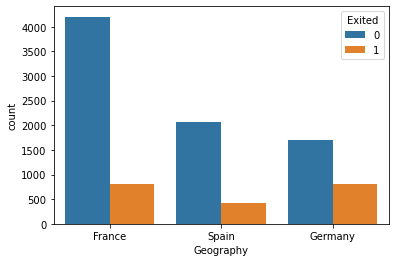

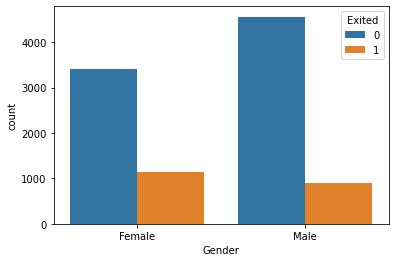

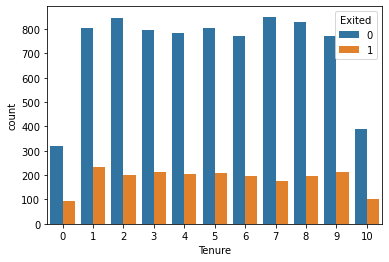

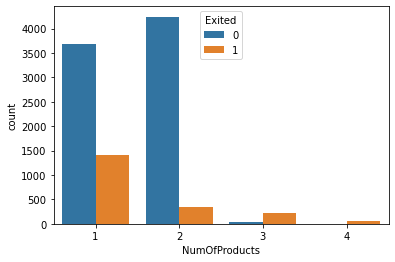

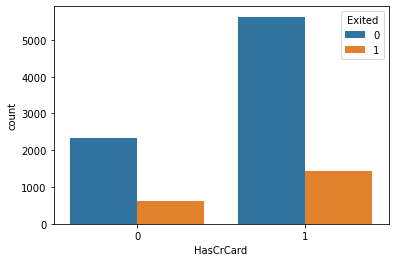

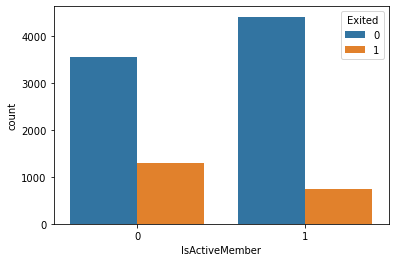

In [30]:
for i, predictor in enumerate(data.drop(['Exited','EstimatedSalary','Balance','Age','CreditScore','RowNumber','Surname'],axis=1)):
    plt.figure(i)
    sns.countplot(data=data,x=predictor,hue='Exited')

# relationship between salary and balance

In [46]:
cols = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']
data_dum = pd.get_dummies(data[cols])
data.drop(cols,axis=1,inplace=True)

In [48]:
data.columns

Index(['RowNumber', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [49]:
data_dum['RowNumber'] = data.RowNumber

In [51]:
dummy_data = pd.merge(data,data_dum, on='RowNumber')

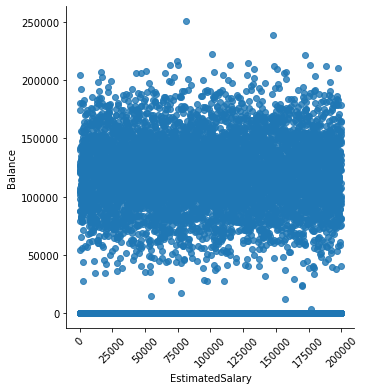

In [57]:
sns.lmplot(data=dummy_data,x='EstimatedSalary',y='Balance',fit_reg=False)
plt.xticks(rotation=45)
plt.show()

In [58]:
dummy_data.columns

Index(['RowNumber', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'EstimatedSalary', 'Exited', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

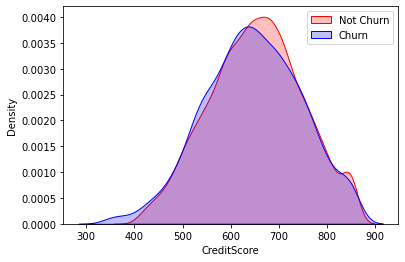

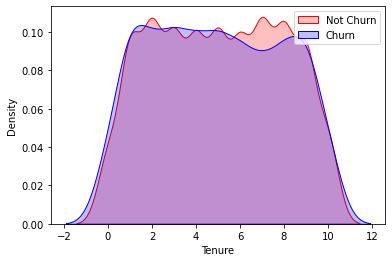

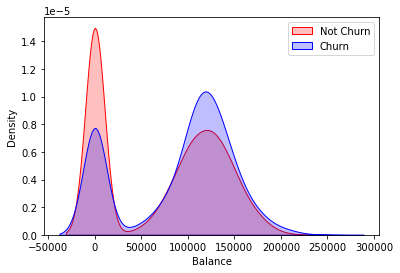

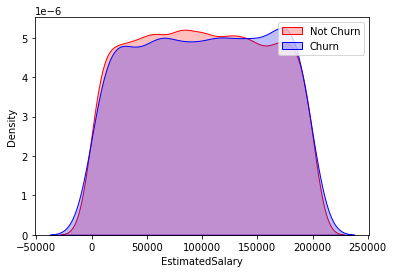

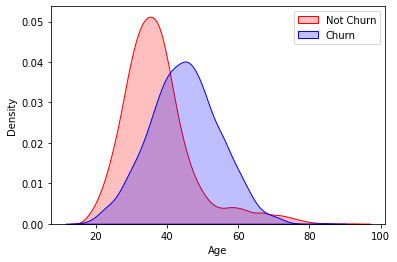

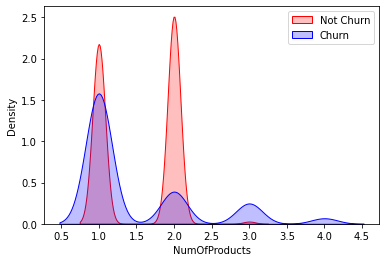

In [70]:
num_col = ['CreditScore','Tenure','Balance','EstimatedSalary','Age','NumOfProducts']
for col in num_col:
    plt.figure(i)
    ax = sns.kdeplot(dummy_data[col][dummy_data.Exited==0],color='red',shade=True)
    ax = sns.kdeplot(dummy_data[col][dummy_data.Exited==1],color='blue',shade=True)
    ax.legend(['Not Churn','Churn'],loc='upper right')
    plt.show()

Insight : Customer churning who have balance in bw 100000 & 150000, age in range of 40 to 50, have one product.

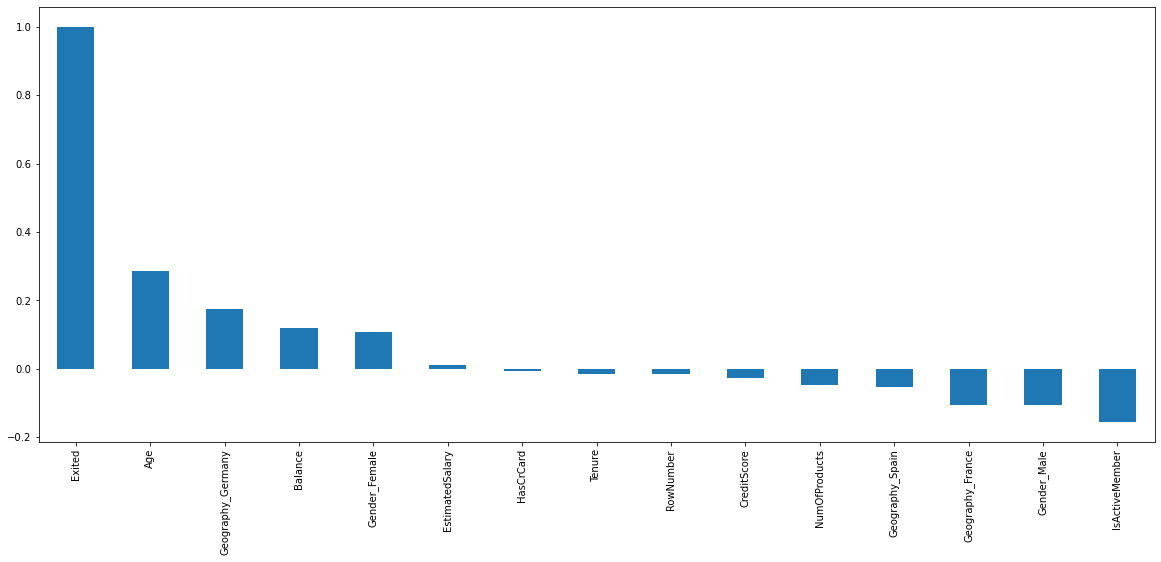

In [72]:
plt.figure(figsize=(20,8))
dummy_data.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')
plt.show()

#High Churn is seen in female, age 40-50, Germany and have balance in bw 100000 & 150000.
and low churn is seen in Spain, France, Male, is Active Member.
Factors like hasCrCard, EstimatedSalary and Tenure has no impact on exiting.

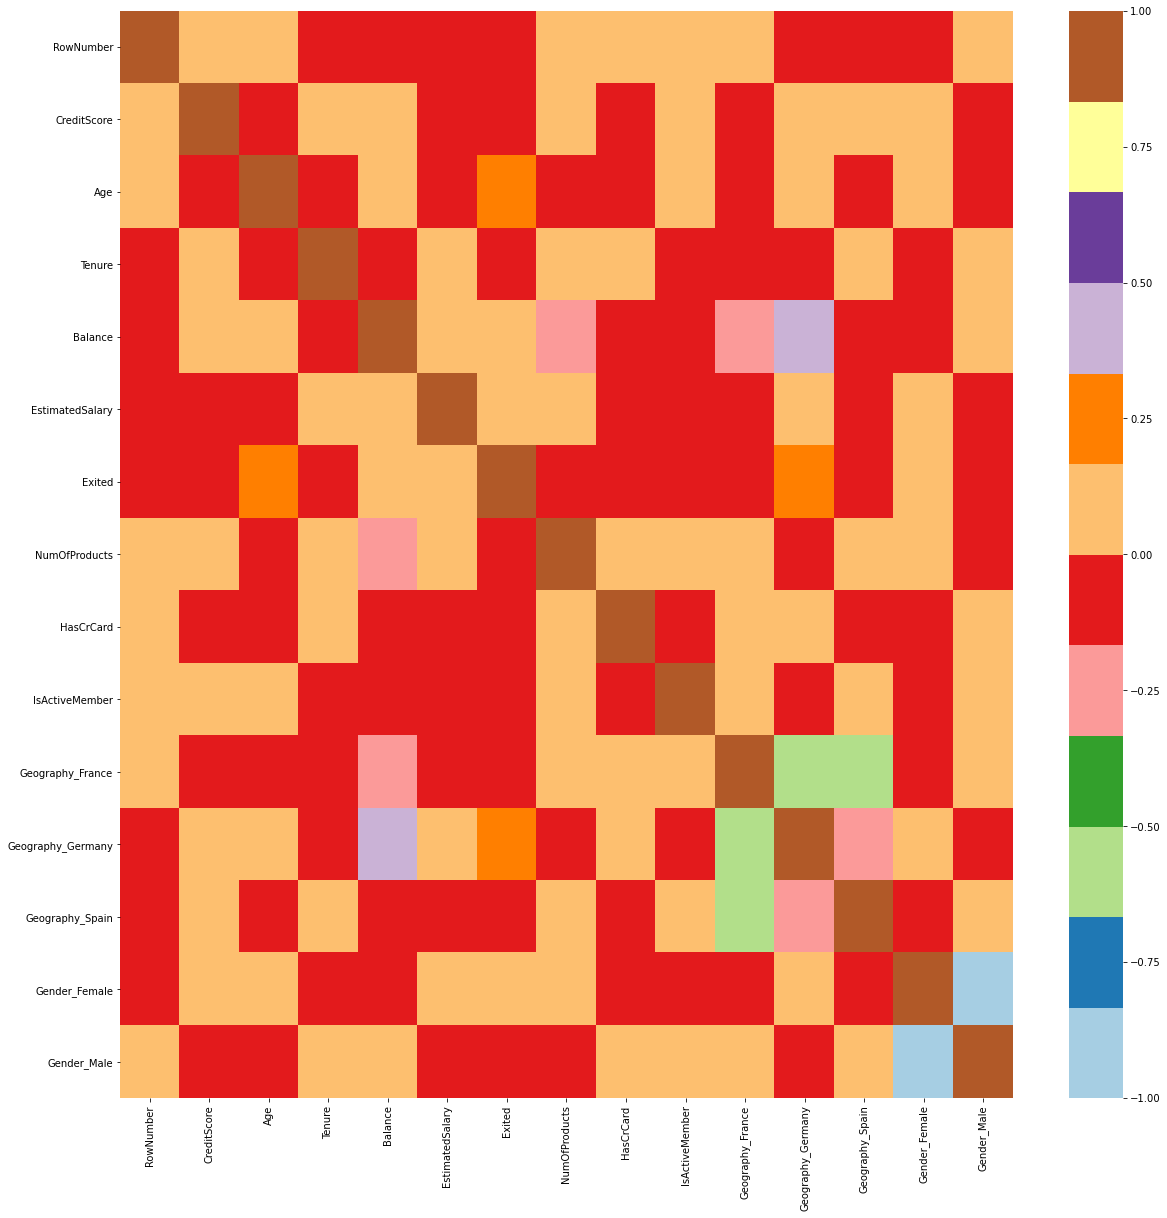

In [73]:
plt.figure(figsize=(20,20))
sns.heatmap(dummy_data.corr(),cmap="Paired")
plt.show()

We can also see the same results in heatmap.

# Bivariate Analysis 

In [91]:
dum_data0 = data1[data1.Exited==0]
dum_data1 = data1[data1.Exited==1]

In [95]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
   
   
    plt.xticks(rotation=45)
    #plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [96]:
data1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

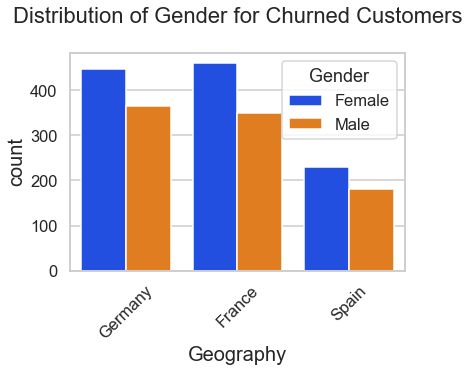

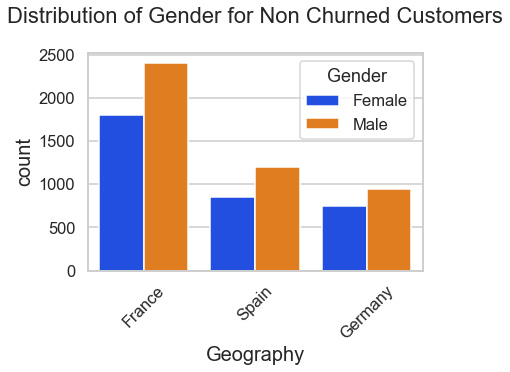

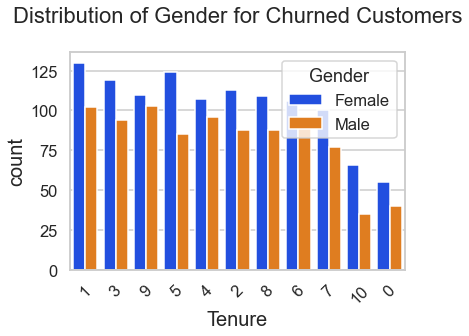

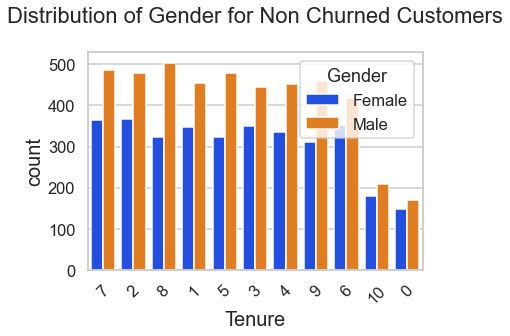

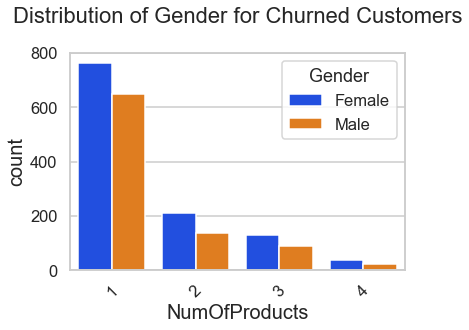

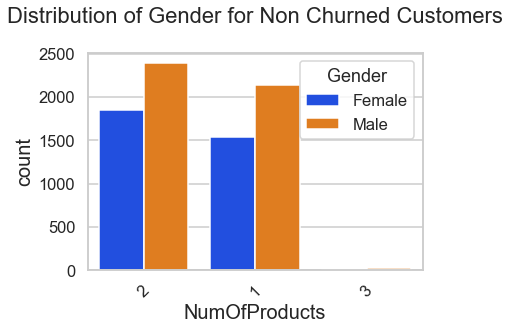

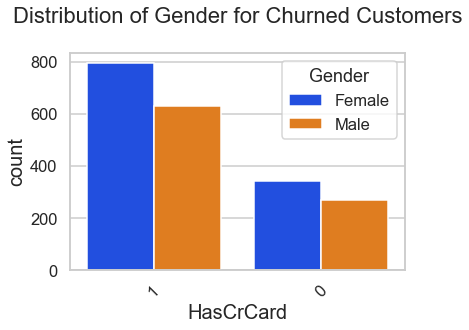

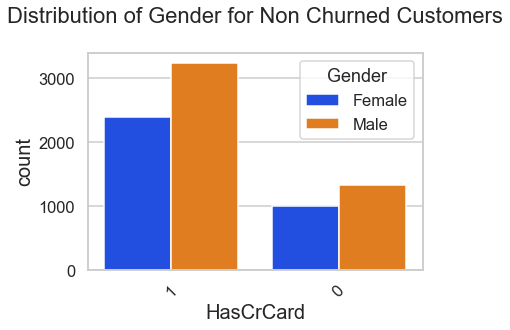

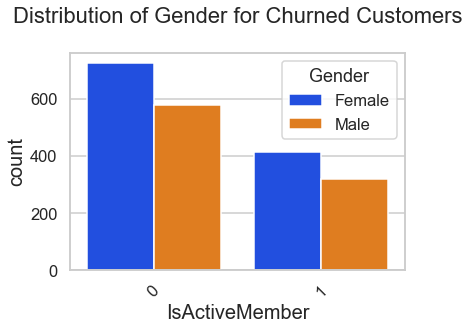

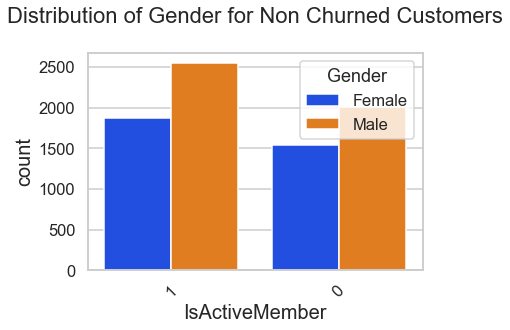

In [101]:
columns = ['Geography','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
for col in columns:
    uniplot(dum_data1,col=col,title='Distribution of Gender for Churned Customers',hue='Gender')
    uniplot(dum_data0,col=col,title='Distribution of Gender for Non Churned Customers',hue='Gender')
    plt.show()

Conclusion: Customer in Germany and France are high churners.
Customers who have one product & has credit card are high churners.
Customers who are not active members are high churners.
Male customers is more likely to churn in compare to female customers.

In [103]:
dummy_data.to_csv('churn.csv')